In [ ]:
import acoular
ts = acoular.TimeSamples( name='three_sources.h5' ) #create an instance of time samples
# note that the 'three_sources.h5' is the example data containing 64 channels time data.
ts
ts.sample_freq

In [7]:
ps = acoular.PowerSpectra( time_data=ts, block_size=128, window='Hanning' )
# setting the FFT parameters for the time data

In [8]:
rg = acoular.RectGrid( x_min=-0.2, x_max=0.2, y_min=-0.2, y_max=0.2, z=0.3, increment=0.01 )
# create a 2D rectangular grid for plotting the source positions later
rg.size

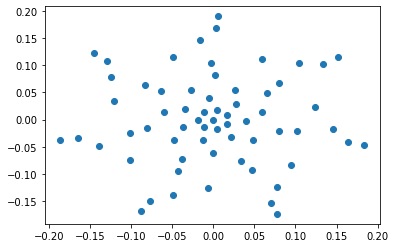

In [12]:
from os import path
micgeofile = path.join(path.split(acoular.__file__)[0],'xml','array_64.xml')
mg = acoular.MicGeom( from_file=micgeofile ) # loading the geometry file of the mic array
#print(micgeofile)
# plotting the geometry with matplotlib
import pylab as plt
plt.ion() # switch on interactive plotting mode
plt.plot(mg.mpos[0],mg.mpos[1],'o')

In [13]:
st = acoular.SteeringVector( grid=rg, mics=mg ) # create the steering vector for the geom above
bb = acoular.BeamformerBase( freq_data=ps, steer=st ) # create a BeamformerBase object which encapsulates the BF algorithm

In [14]:
pm = bb.synthetic( 8000, 3 ) # start calculating for freq:8000, third octave band
Lm = acoular.L_p( pm ) # convert to dB

[('three_sources_cache.h5', 1)]
[('three_sources_cache.h5', 2)]


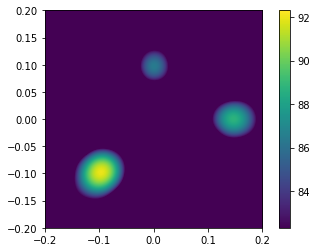

In [15]:
plt.figure() # open new figure
plt.imshow( Lm.T, origin='lower', vmin=Lm.max()-10, extent=rg.extend(), interpolation='bicubic')
plt.colorbar()